In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7bf41fc3d9425f0dfc6d6dc443c166a5


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | beloha
Processing Record 4 of Set 1 | tambo
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | bilma
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | mbarara
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | ekhabi
Processing Record 12 of Set 1 | maceio
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | amga
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | sorland
Processing Record 22 of Set 1 | pacific grove
Processing 

Processing Record 39 of Set 4 | marawi
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | santiago de cuba
Processing Record 45 of Set 4 | beira
Processing Record 46 of Set 4 | lerwick
Processing Record 47 of Set 4 | butaritari
Processing Record 48 of Set 4 | waipawa
Processing Record 49 of Set 4 | kathu
Processing Record 50 of Set 4 | longlac
City not found. Skipping...
Processing Record 1 of Set 5 | huangnihe
Processing Record 2 of Set 5 | ewa beach
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | comodoro rivadavia
Processing Record 5 of Set 5 | sekoma
Processing Record 6 of Set 5 | yerofey pavlovich
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | kargapolye
City not found. Skipping...
Processing Record 9 of Set 5 | tutoia
Processing Record 10 of Set 5 | vestmanna
Processing Record 11 of Set 5 |

Processing Record 27 of Set 8 | billings
Processing Record 28 of Set 8 | bereda
Processing Record 29 of Set 8 | panaba
Processing Record 30 of Set 8 | massakory
Processing Record 31 of Set 8 | faya
Processing Record 32 of Set 8 | mandali
Processing Record 33 of Set 8 | mogadishu
Processing Record 34 of Set 8 | progreso
Processing Record 35 of Set 8 | tumbagaan
Processing Record 36 of Set 8 | kungurtug
Processing Record 37 of Set 8 | boljarovo
City not found. Skipping...
Processing Record 38 of Set 8 | sarkand
Processing Record 39 of Set 8 | olafsvik
Processing Record 40 of Set 8 | aguimes
Processing Record 41 of Set 8 | port hedland
Processing Record 42 of Set 8 | krouson
Processing Record 43 of Set 8 | kailua
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | pontianak
Processing Record 46 of Set 8 | shar
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | kungalv
Processing Record 49 of Set 8 | walvis bay
Processing Record 50 of Set 8 | consti

Processing Record 15 of Set 12 | tagusao
Processing Record 16 of Set 12 | brokopondo
Processing Record 17 of Set 12 | lubao
Processing Record 18 of Set 12 | santa isabel do rio negro
Processing Record 19 of Set 12 | cururupu
Processing Record 20 of Set 12 | trincomalee
Processing Record 21 of Set 12 | kostomuksha
Processing Record 22 of Set 12 | berwick
Processing Record 23 of Set 12 | vanavara
Processing Record 24 of Set 12 | kismayo
Processing Record 25 of Set 12 | bang saphan
Processing Record 26 of Set 12 | port augusta
Processing Record 27 of Set 12 | te anau
Processing Record 28 of Set 12 | kaset sombun
Processing Record 29 of Set 12 | rakitnoye
Processing Record 30 of Set 12 | mazyr
Processing Record 31 of Set 12 | satitoa
City not found. Skipping...
Processing Record 32 of Set 12 | grants
Processing Record 33 of Set 12 | belyy yar
Processing Record 34 of Set 12 | inuvik
Processing Record 35 of Set 12 | simao
Processing Record 36 of Set 12 | sirnak
Processing Record 37 of Set 12

In [10]:
len(city_data)

550

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,55.58,94,100,1.01,US,2021-10-26 17:35:09
1,Qaanaaq,77.4840,-69.3632,16.86,94,100,14.23,GL,2021-10-26 17:39:56
2,Beloha,-25.1667,45.0500,79.14,57,59,7.36,MG,2021-10-26 17:39:57
3,Tambo,-14.8000,-73.9167,54.63,16,7,16.58,PE,2021-10-26 17:39:57
4,Mataura,-46.1927,168.8643,50.94,100,100,0.34,NZ,2021-10-26 17:39:57
5,Bilma,18.6853,12.9164,87.46,12,0,7.29,NE,2021-10-26 17:39:58
6,Mbarara,-0.6080,30.6500,64.74,82,88,1.86,UG,2021-10-26 17:39:58
7,Vaini,-21.2000,-175.2000,71.76,83,20,11.50,TO,2021-10-26 17:39:59
8,Bluff,-46.6000,168.3333,51.39,92,100,2.84,NZ,2021-10-26 17:39:59
9,Ekhabi,53.5102,142.9671,34.97,89,96,5.99,RU,2021-10-26 17:39:59


In [12]:
#Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#Display DataFrame with columns in desired order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-26 17:35:09,42.6001,-73.9662,55.58,94,100,1.01
1,Qaanaaq,GL,2021-10-26 17:39:56,77.4840,-69.3632,16.86,94,100,14.23
2,Beloha,MG,2021-10-26 17:39:57,-25.1667,45.0500,79.14,57,59,7.36
3,Tambo,PE,2021-10-26 17:39:57,-14.8000,-73.9167,54.63,16,7,16.58
4,Mataura,NZ,2021-10-26 17:39:57,-46.1927,168.8643,50.94,100,100,0.34
5,Bilma,NE,2021-10-26 17:39:58,18.6853,12.9164,87.46,12,0,7.29
6,Mbarara,UG,2021-10-26 17:39:58,-0.6080,30.6500,64.74,82,88,1.86
7,Vaini,TO,2021-10-26 17:39:59,-21.2000,-175.2000,71.76,83,20,11.50
8,Bluff,NZ,2021-10-26 17:39:59,-46.6000,168.3333,51.39,92,100,2.84
9,Ekhabi,RU,2021-10-26 17:39:59,53.5102,142.9671,34.97,89,96,5.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

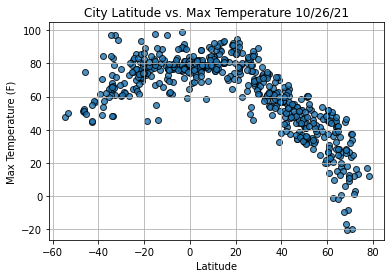

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

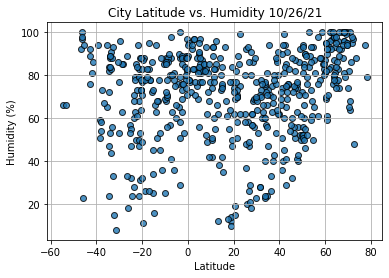

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

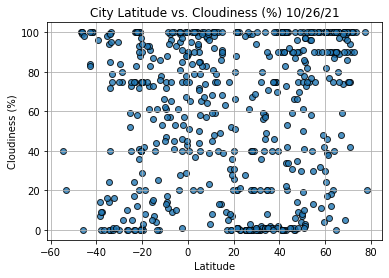

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

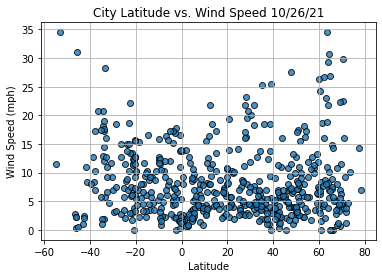

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                         Amga
Country                        RU
Date          2021-10-26 17:40:01
Lat                       60.8953
Lng                      131.9608
Max Temp                     30.6
Humidity                       94
Cloudiness                    100
Wind Speed                   1.59
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
545     True
546     True
547    False
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-26 17:35:09,42.6001,-73.9662,55.58,94,100,1.01
1,Qaanaaq,GL,2021-10-26 17:39:56,77.4840,-69.3632,16.86,94,100,14.23
5,Bilma,NE,2021-10-26 17:39:58,18.6853,12.9164,87.46,12,0,7.29
9,Ekhabi,RU,2021-10-26 17:39:59,53.5102,142.9671,34.97,89,96,5.99
11,Bethel,US,2021-10-26 17:40:00,41.3712,-73.4140,63.10,94,100,3.00


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

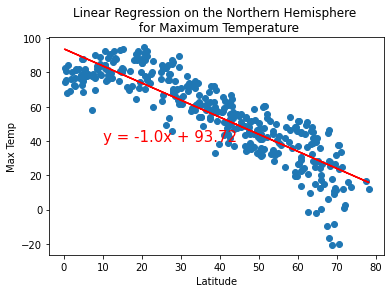

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

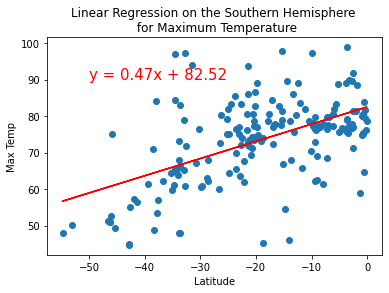

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

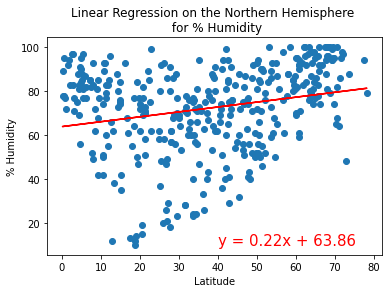

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

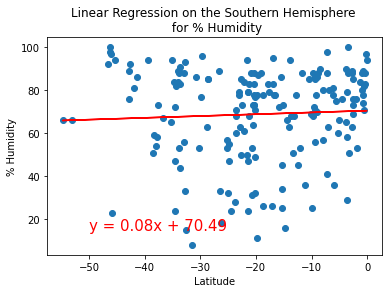

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

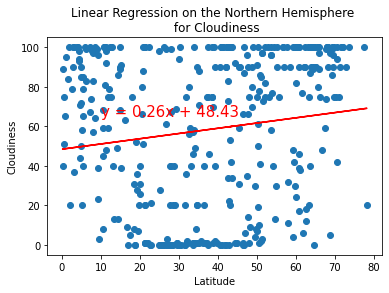

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(10,65))

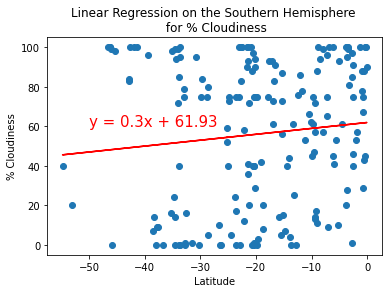

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

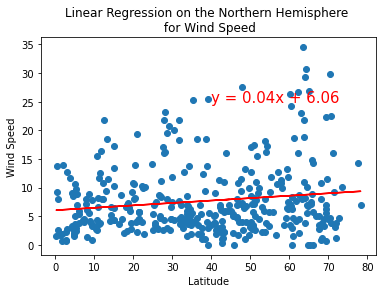

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))